In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from itertools import combinations
import warnings 
warnings.filterwarnings("ignore")

# 生成示例数据
df = pd.read_csv("./repro-out/pred_nonoisy.csv")

out0 =pd.read_csv("./initial-out/pred_nonoisy_initial.csv")
x= df.index
data = df.copy()
            

In [5]:
# 定义属性模板
attributes_template = ["value"]
results_df = pd.DataFrame()
# 计算特定聚类的质心的函数
def calculate_centroids_with_attrs(data, clustering_col, attributes):
    centroids = {}
    for cluster_id in range(4):
        cluster_data = data[data[clustering_col] == cluster_id]
        centroid = cluster_data[attributes].mean()
        centroids[cluster_id] = centroid
    return centroids

def calculate_row(data, cluster_col, attributes, row_name, df):
    centroids = calculate_centroids_with_attrs(data, cluster_col, attributes)
    
    # 提取质心值并构建一个数据框
    centroids_df = pd.DataFrame(centroids).T
    centroids_df.columns = ['value']
    
    # 按照Rooftop_area进行排序
    centroids_df = centroids_df.sort_values(by='value')
    print("centroids_df", centroids_df)
    # 重新分配新的聚类标签
    sorted_clusters = centroids_df.index.tolist()
    print("sorted_clusters", sorted_clusters)
    cluster_mapping = {original_cluster: new_cluster for new_cluster, original_cluster in enumerate(sorted_clusters, start=1)}
    print("cluster_mapping", cluster_mapping)
    data[f'new_{cluster_col}'] = data[cluster_col].map(cluster_mapping)
    
    # 重新计算新的聚类质心
    new_centroids = calculate_centroids_with_attrs(data, f'new_{cluster_col}', attributes)
    new_centroids_df = pd.DataFrame(new_centroids).T
    new_centroids_df.columns = ['value']
    
    # 检查空值
    print(f"new_{cluster_col} column null values:", data[f'new_{cluster_col}'].isnull().sum())
    print(f"new_centroids_df null values:", new_centroids_df['value'].isnull().sum())
    
    # 将排序后的结果添加到结果数据框中
    df[row_name] = list(new_centroids_df['value'])

    return data, df

# 计算每个复现聚类结果的质心
for i in range(1001):
    # print(i)
    cluster_col = f'Out{i}'
    attributes = attributes_template
    data_repro, results_df = calculate_row(data, cluster_col, attributes, f'Out{i}', results_df)

# data.to_csv('repro-out/filtered_data.csv')
print(data_repro)
data_repro.to_csv('repro-out/filtered_data.csv')

KeyError: 'Out0'

In [ ]:
# 筛选data_repro中包含新列的部分
filtered_data_repro = data[[f'new_Out{i}' for i in range(1, 1001)]]

# 计算每一行的cluster数及出现的频率
cluster_counts = filtered_data_repro.apply(pd.Series.value_counts, axis=1).fillna(0)
cluster_frequencies = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)

# new_pred_cols = [f'new_pred{i}' for i in range(1, 1001)]
# filtered_data_repro['clusters_array'] = filtered_data_repro[new_pred_cols].apply(lambda row: row.unique(), axis=1)


filtered_data_repro.to_csv('repro-out/filtered_data_repro.csv')
# print(filtered_data_repro)

filtered_data_initial = data[[f'new_Out0']]
print(filtered_data_initial)

     new_Out0
0           3
1           3
2           3
3           3
4           3
..        ...
620         2
621         3
622         4
623         4
624         4

[625 rows x 1 columns]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('repro-out/filtered_data.csv')

relative_frequency=[]

# 创建频率分布图的函数
def plot_histogram(row_data, row_index):
    initial_value=filtered_data_initial.loc[row_index,:].values[0]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    # print(frequencies)
    
    categories = [1, 2, 3, 4]
    frequency_values = [frequencies.get(category, 0) for category in categories]
    print(frequency_values)
    # 确定initial_value所在的类别及其频率
    initial_category = int(initial_value)
    initial_frequency = frequencies.get(initial_category, 0)
    relative_frequency.append(initial_frequency / len(row_data)) 
    # print(initial_relative_frequency)

    # plt.figure(figsize=(10, 6))
    # plt.bar(categories, frequency_values, tick_label=categories,alpha=0.3,label="Reproduced values")
    # plt.title(f'Frequency Distribution of Row {row_index} \n The probability of reproducbility is {initial_frequency / len(row_data) *100}%')
    # plt.axvline(x=initial_category, color='red', linestyle='dashed', linewidth=2, label=f'Initial value: {initial_value}')
    # plt.legend()
    # plt.xlabel('Category')
    # plt.ylabel('Frequency')
    # plt.ylim(0, max(frequency_values) + 10)  # Adjust ylim for better visualization
    # plt.show()

# 为每一行绘制直方图 filtered_data_repro.shape[0]
# print(filtered_data_repro.loc[0,:])
data2 = pd.read_csv('repro-out/filtered_data_repro.csv')
# filtered_data_repro= data2.iloc[:,1:1001]
# print(filtered_data_repro)
for i in range(1,filtered_data_repro.shape[0]):
    plot_histogram(filtered_data_repro.loc[i,:], i)

# 计算initial_relative_frequency数组的期望（均值）
expected_value = np.mean(relative_frequency)
print("Expected Value of Initial Relative Frequencies:", expected_value)


[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 661, 339, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[1000, 0, 0, 0]
[1000, 0, 0, 0]
[0, 1000, 0, 0]
[0, 663, 337, 0]
[0, 0, 1000, 0]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 442, 558]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 0, 1000, 0]
[0, 0, 673, 327]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 1000, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 1000, 0, 0]
[0, 442, 558, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 1000, 0]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 56, 944]
[0, 0, 1000, 0]
[0, 442, 558, 0]
[0, 1000, 0, 0]
[1000, 0, 0, 0]
[1000, 0, 0, 0]
[0, 1000, 0, 0]
[0, 0, 1000, 0]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 0, 1000]
[0, 0, 1000, 0]
[0, 442, 558, 0]
[

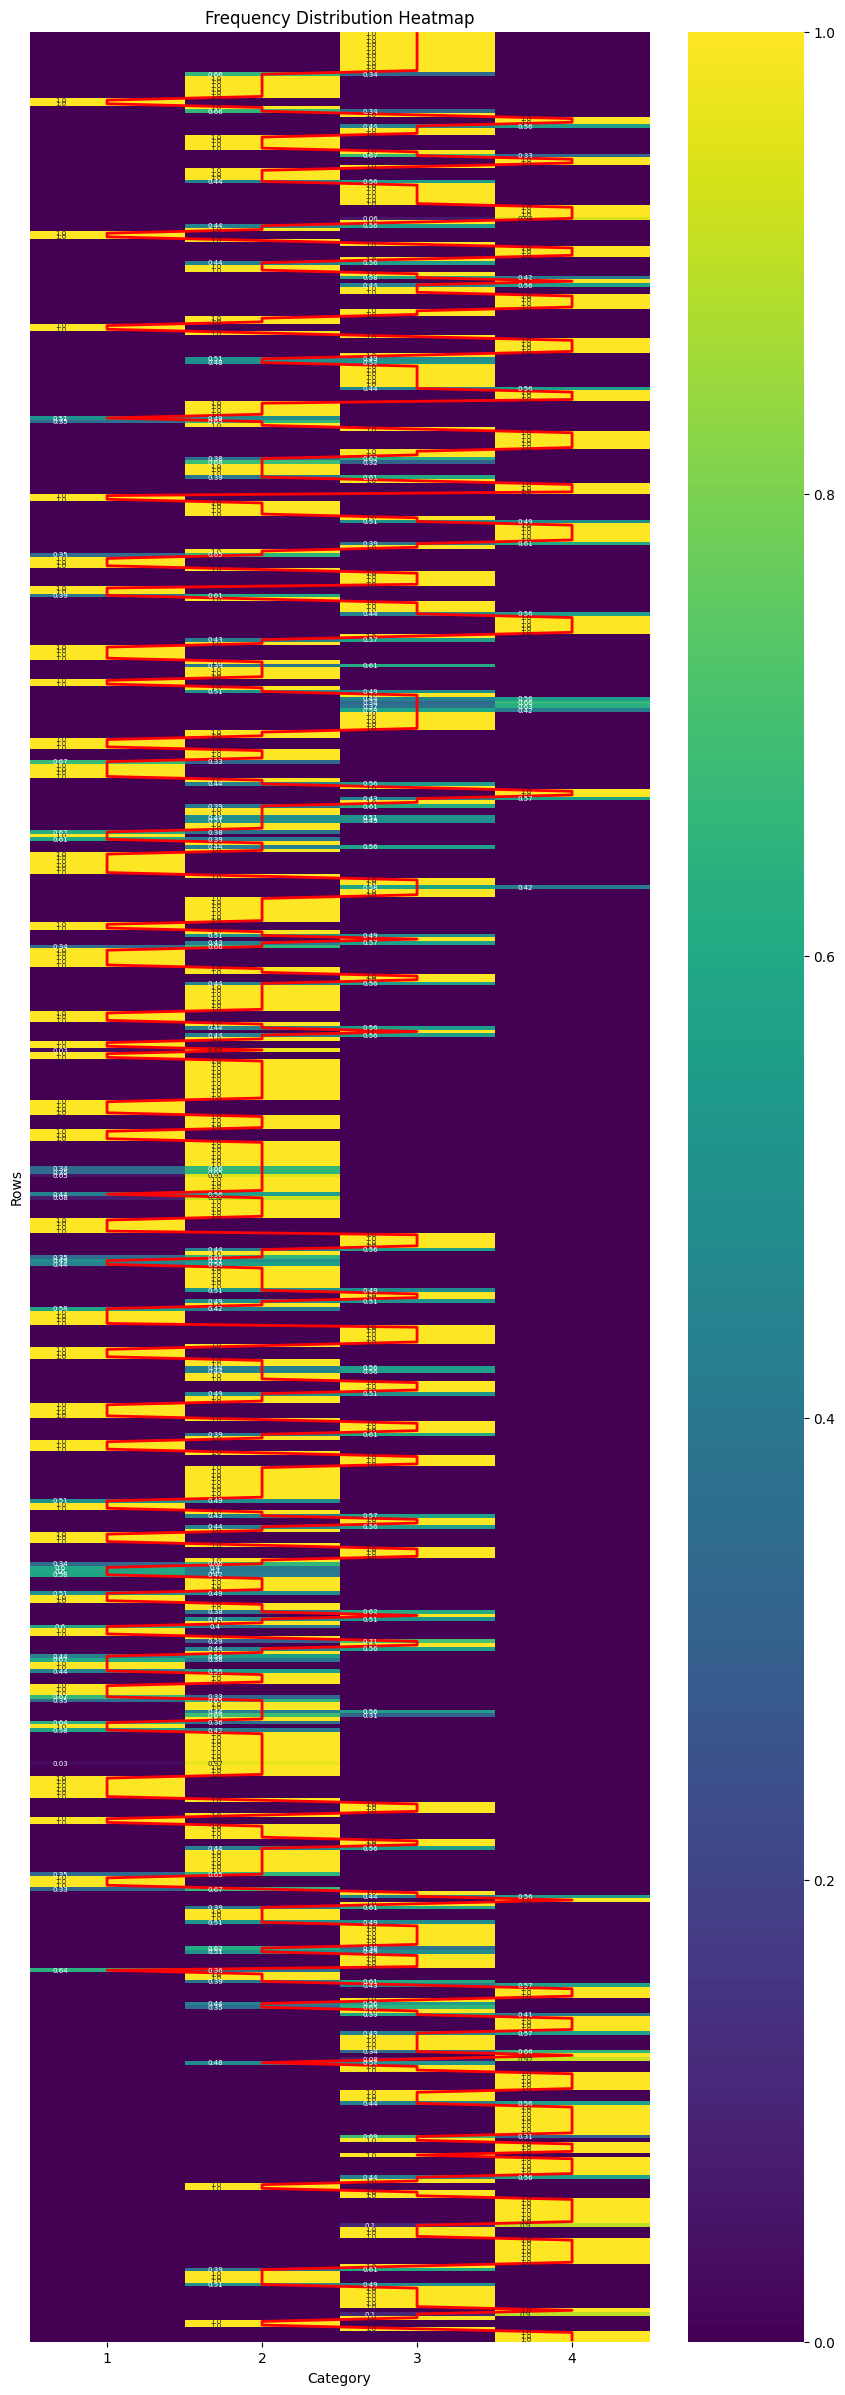

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


#竖着的heat
# 创建一个矩阵来存储频率分布
frequency_matrix = np.zeros((filtered_data_repro.shape[0], 4))

# 填充频率矩阵
for i in range(filtered_data_repro.shape[0]):
    row_data = filtered_data_repro.loc[i, :]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    for category in [1, 2, 3, 4]:
        frequency_matrix[i, category - 1] = frequencies.get(category, 0) / len(row_data)

# 创建一个矩阵来存储注释（只显示值大于0的标签）
annotations = np.where(frequency_matrix > 0, np.round(frequency_matrix, 2), '')


# 绘制热力图
plt.figure(figsize=(10, 30))
ax = sns.heatmap(frequency_matrix, annot=annotations, fmt="", xticklabels=[1, 2, 3, 4], yticklabels=False, cmap="viridis", cbar=True,
                 annot_kws={"size": 5, "ha": "center", "va": "center", "clip_on": True})
plt.title('Frequency Distribution Heatmap')
plt.xlabel('Category')
plt.ylabel('Rows')

# 调整标签的位置
for text in ax.texts:
    text.set_x(float(text.get_position()[0]) - 0.3)
    
# 添加表示filtered_data_initial的线
initial_values = filtered_data_initial['new_Out0'].values - 1  # 将值转换为索引
plt.plot(initial_values + 0.5, np.arange(0.5, filtered_data_repro.shape[0]+0.5), color='red', linewidth=2, label='Initial Value')  # +0.5 to center the line


# plt.show()

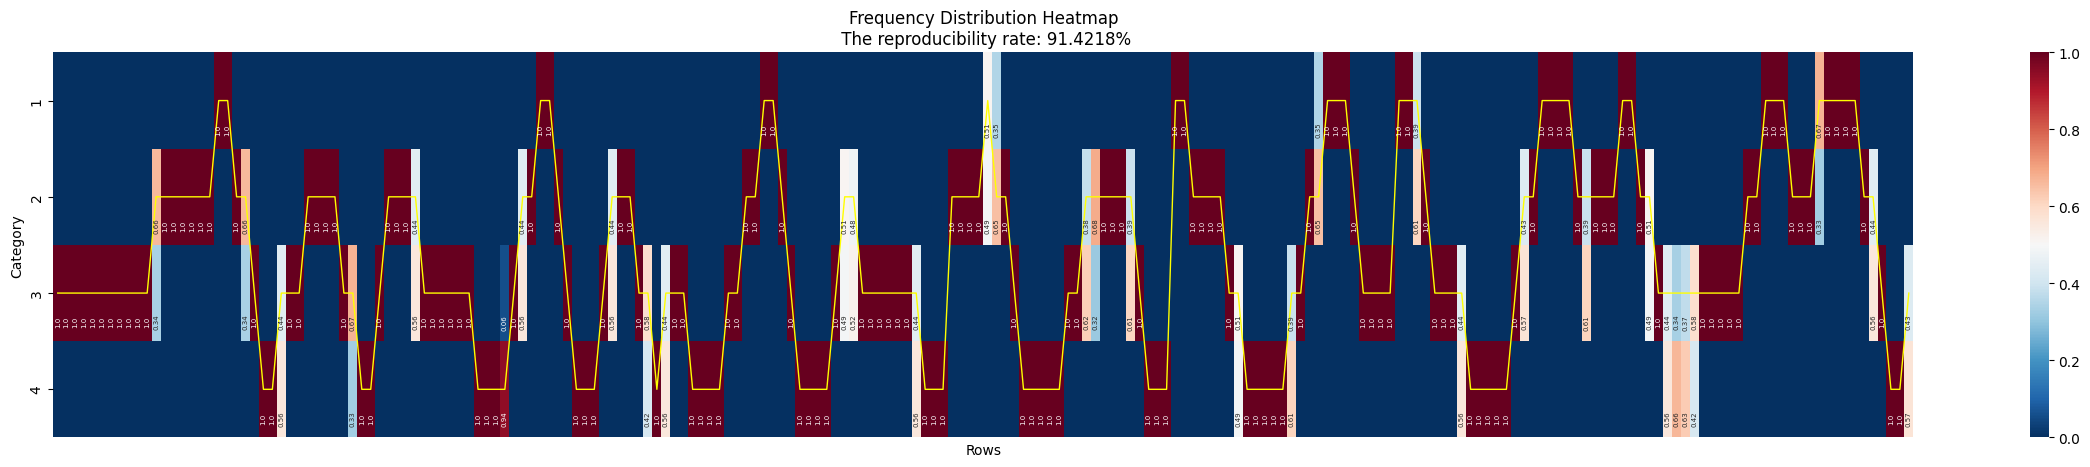

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 仅选择前20行的数据
number = filtered_data_repro.shape[0]//3
repro = filtered_data_repro.iloc[:number, :]
initial = filtered_data_initial.iloc[:number, :]
# repro = filtered_data_repro
# initial = filtered_data_initial

# 创建一个矩阵来存储频率分布
frequency_matrix = np.zeros((repro.shape[0], 4))

# 填充频率矩阵
for i in range(repro.shape[0]):
    row_data = repro.loc[i, :]
    unique, counts = np.unique(row_data, return_counts=True)
    frequencies = dict(zip(unique, counts))
    for category in [1, 2, 3, 4]:
        frequency_matrix[i, category - 1] = frequencies.get(category, 0) / len(row_data)

# 创建一个矩阵来存储注释（只显示值大于0的标签）
annotations = np.where(frequency_matrix > 0, np.round(frequency_matrix, 2), '')

# 绘制热力图
plt.figure(figsize=(30, 5))

ax = sns.heatmap(frequency_matrix.T, annot=annotations.T, fmt="", xticklabels=False, yticklabels=[1, 2, 3, 4], cmap="RdBu_r", cbar=True,
                 annot_kws={"size": 5, "ha": "center", "va": "center", "rotation": 90,"clip_on": True}) #cmap="viridis"

plt.title(f'Frequency Distribution Heatmap\n The reproducibility rate: {round(expected_value*100,4)}%')
plt.ylabel('Category')
plt.xlabel('Rows')

# 调整标签的位置
for text in ax.texts:
    text.set_y(float(text.get_position()[1]) + 0.3)

# 添加表示filtered_data_initial的线
initial_values = initial['new_Out0'].values - 1  # 将值转换为索引
plt.plot(np.arange(0.5, repro.shape[0] + 0.5), initial_values + 0.5, color='yellow', linewidth=1, label='Initial Value')
plt.savefig("repro-out/heatmap.svg")
plt.show()


计算 ARI 统计量:
原始结果与复现结果之间的ARI 95%置信区间: (0.634865798764543, 0.9967794820919688);随机误差范围: (0.5931759704749564, 1.0)
ARI置信区间覆盖率: 1.00；概率0.7516


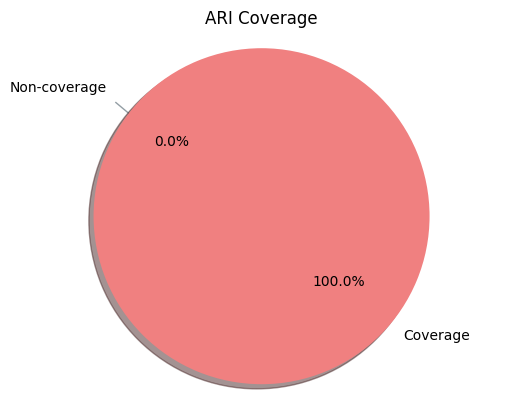


计算 NMI 统计量:
原始结果与复现结果之间的NMI 95%置信区间: (0.7048283673584766, 0.9929349545054262);随机误差范围: (0.6793249016723052, 1.0)
NMI置信区间覆盖率: 1.00；概率0.7587


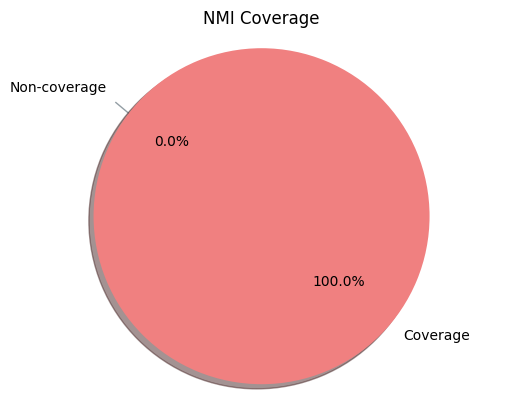


计算 Kappa 统计量:
原始结果与复现结果之间的Kappa 95%置信区间: (0.789359973605696, 0.9977583220053872);随机误差范围: (0.7594974246366425, 1.0)
Kappa置信区间覆盖率: 1.00；概率0.7579


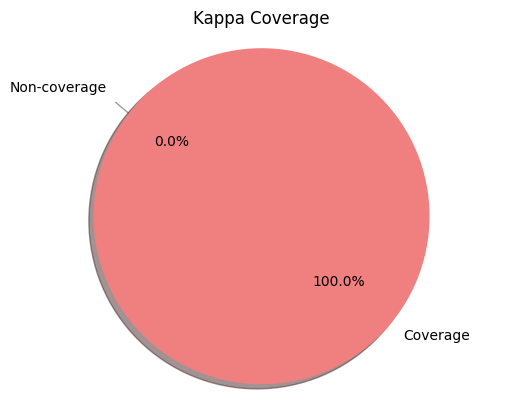

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, cohen_kappa_score
from itertools import combinations
import scipy.stats as stats

# 设定随机种子以确保结果一致


# 计算置信区间
def calculate_confidence_interval(values, alpha=0.05):
    values = np.sort(values)
    lower_bound = np.percentile(values, alpha / 2 * 100)
    upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

# 蒙特卡洛抽样并计算指定类型的统计量
def monteCarloMethod(num_samples, data, stat_type):
    monteCarlo_statistics_values = []
    sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    
    for comb in sampled_combinations:
        i, j = comb
        monteCarlo_statistics_values.append(calculate_statistic_values(data[i], data[j], stat_type))
    
    return monteCarlo_statistics_values



# 计算指定类型的统计量
def calculate_statistic_values(data1, data2, stat_type):
    if stat_type == "ARI":
        return adjusted_rand_score(data1, data2)
    elif stat_type == "NMI":
        return normalized_mutual_info_score(data1, data2)
    elif stat_type == "Kappa":
        return cohen_kappa_score(data1, data2)

# 计算覆盖率
def calculate_coverage(interval1, interval2):
    L1, U1 = interval1
    L2, U2 = interval2
    L_overlap = max(L1, L2)
    U_overlap = min(U1, U2)
    if L_overlap > U_overlap:
        return 0.0
    overlap_length = U_overlap - L_overlap
    length1 = U1 - L1
    coverage = overlap_length / length1
    return coverage
# def calculate_proportion(values, lower_bound, upper_bound):
#     # value
#     return np.sum((values >= lower_bound) & (values <= upper_bound)) / len(values)
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保 values 是一个一维数组或列表
    values = np.asarray(values).flatten()
    
    common_count = 0
    total_count = len(values)
    for value in values:
        if lower_bound <= value <= upper_bound:
            common_count += 1
            
    return common_count / total_count

# 数据加载
data_df = pd.read_csv('repro-out/filtered_data.csv')
filtered_data_repro = data_df[[f'new_Out{i}' for i in range(1, 1001)]]
out0 = data_df['new_Out0']

# 定义要计算的统计量类型
stat_types = ["ARI", "NMI", "Kappa"]  # 可选值："ARI", "NMI", "Kappa"

for stat_type in stat_types:
    print(f"\n计算 {stat_type} 统计量:") 
    # 计算原始结果与复现结果的指定统计量
    real_values = [calculate_statistic_values(out0, filtered_data_repro[f'new_Out{i}'], stat_type) for i in range(1, 1001)]
    # 计算置信区间-----总误差
    ci_low, ci_high = calculate_confidence_interval(real_values)
    # -----随机误差
    monteCarlo_values = monteCarloMethod(10000, filtered_data_repro, stat_type)
    ci_low_mc_random, ci_high_mc_random = calculate_confidence_interval(monteCarlo_values)
    print(f"原始结果与复现结果之间的{stat_type} 95%置信区间: ({ci_low}, {ci_high});随机误差范围: ({ci_low_mc_random}, {ci_high_mc_random})")
    # 计算覆盖率

    ratio_original = calculate_proportion(monteCarlo_values, ci_low, 1)


    coverage = calculate_coverage((ci_low, 1), (ci_low_mc_random, ci_high_mc_random))
    print(f"{stat_type}置信区间覆盖率: {coverage:.2f}；概率{ratio_original}")
    # 绘制覆盖率图

     # 绘制覆盖率的饼图
    fig, ax = plt.subplots()
    labels = ['Coverage', 'Non-coverage']
    sizes = [coverage, 1-coverage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # 突出显示覆盖率
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=140)
    ax.axis('equal')
    plt.title(f'{stat_type} Coverage')
    plt.show()


In [ ]:
from sklearn.metrics import (
    adjusted_rand_score, 
    adjusted_mutual_info_score, 
    homogeneity_completeness_v_measure, 
    fowlkes_mallows_score, 
    jaccard_score
)

def calculate_clustering_similarity(true_labels, predicted_labels):
    similarity_measures = {
        "Adjusted Rand Index": adjusted_rand_score,
        "Adjusted Mutual Information": adjusted_mutual_info_score,
        "Homogeneity": lambda x, y: homogeneity_completeness_v_measure(x, y)[0],
        "Completeness": lambda x, y: homogeneity_completeness_v_measure(x, y)[1],
        "V-Measure": lambda x, y: homogeneity_completeness_v_measure(x, y)[2],
        "Fowlkes-Mallows Index": fowlkes_mallows_score,
        "Jaccard Index": lambda x, y: jaccard_score(
            [1 if label == 0 else 0 for label in x], 
            [1 if label == 0 else 0 for label in y]
        )  # Example for binary case, adjust accordingly for multi-class
    }
    
    results = {}
    for measure_name, measure_func in similarity_measures.items():
        results[measure_name] = measure_func(true_labels, predicted_labels)
    
    return results

# 示例聚类标签
labels_true = data["Out0"]
labels_pred = data["Out18"]

# 计算相似性
similarity_results = calculate_clustering_similarity(labels_true, labels_pred)

# 打印结果
for measure, result in similarity_results.items():
    print(f"{measure}: {result}")

Adjusted Rand Index: 0.634865798764543
Adjusted Mutual Information: 0.7032003266175793
Homogeneity: 0.709146198281729
Completeness: 0.7005627988145978
V-Measure: 0.7048283673584766
Fowlkes-Mallows Index: 0.7372517486318747
Jaccard Index: 0.7407407407407407
